# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called `chipo`.

In [4]:
url ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')

chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. Display the first 10 entries.

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

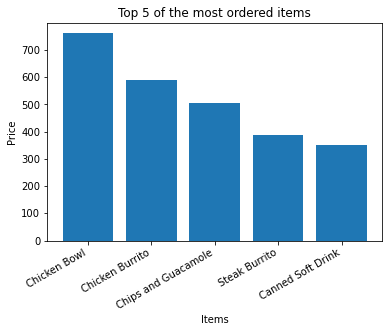

In [6]:
# Copying dataframe to not override the original contents.
df = chipo.copy()

# Group by item sold, summing up each column individually per item, and selecting the quantity
quantity_count = df.groupby(by= "item_name" ).sum().quantity

# Sorting the quantity and resetting the index to get back a dataframe
sorted_items = quantity_count.sort_values(ascending = False).reset_index()

# Extracting the top number of items ( x = names, y = quantity)
max_items = 5
names = sorted_items.item_name.head(max_items)
quantity = sorted_items.quantity.head(max_items)

plt.bar(names, quantity)
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Top 5 of the most ordered items')
plt.xticks(rotation=30, ha='right')

 # Rotating axis labels and aligning them to the right.


### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

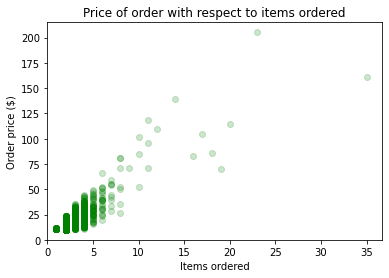

In [7]:


# Creating a function to remove the dollar sign and casting the price to float

def strip_dollar(price):
    return float(price.strip('$'))

# Apply the above function to the item_price column
df.item_price = df.item_price.apply(strip_dollar)

# Group by the order ID and sum the price and the items ordered.
orders = df.groupby("order_id").sum()

# Create the scatter plot. Use alpha=0.2 to make points semi-transparent to see where most clusters are.
plt.scatter(x = orders.quantity, y = orders.item_price, c = 'green', alpha = 0.2)



# Set the title and labels
plt.xlabel('Items ordered')
plt.ylabel('Order price ($)')
plt.title('Price of order with respect to items ordered')
plt.ylim(0)
plt.xlim(0)

plt.show()

### BONUS: Create a question and a graph to answer your own question.